In [249]:
from IPython.display import display
import IPython
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
import sklearn as skl
%matplotlib notebook
%matplotlib inline
import tensorflow as tf
!pip install mglearn
!pip install gensim
!pip install nltk
import nltk

import mglearn as mglearn
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
!pip install konlpy
import konlpy


In [250]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [251]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


# Data 불러오기

csv 파일에 있는 번호 그대로를 key값 처럼 사용하고자 함

In [252]:
data = pd.read_csv('/gdrive/My Drive/Colab Notebooks/Pyeong Chang/27번문항 수정1.csv')
data.index=data['번호']
del data['번호']


In [253]:
data.shape
data.columns

Index(['커멘트'], dtype='object')

# 전처리

#### 특수문자 지우기

In [254]:
import re
data['clean_doc'] = data['커멘트'].str.replace("[^가-힣]", " ")

In [255]:
clean_doc=pd.DataFrame(data['clean_doc'])
clean_doc.columns=['Question']
clean_doc.index=data.index
clean_doc

Question
번호                                                    
1                              먹거리가 딱히      가격도 좀 비싸고요
3                  스키장 외엔 별로입니다  블로그등 광고를 통해 많이 홍보해주세요
4    관광콘텐츠  평칭만의 특별한 관광콘텐츠개발이 필요함  모든연령층의 이목을 주목시킬만...
5              그지역에서만 비교적 저렴한가격으로 맛볼수있는 먹거리가 있었으면 합니다 
6    평창하면 올림픽인데 딱히 이것밖에 없다는 이미지가 강한거같아요  코로나  로 제약이...
..                                                 ...
689                             핫스팟 개발로 젊은층 유입이 필요해 보임
690                           가성비 좋은 숙박시설이 더 많아졌음 좋겠어요
691  지역축제 장터 체험학습등이 좀더 활성화되고 먹거리가 다양하게 맛있고 많이 있었음 좋...
692            사계절  두루 즐길 수 있는 관광거리들이  많이 개  되었으면 좋겠어요
693                                 한우말곤 그닥할거랑 먹을것이 없음

[559 rows x 1 columns]

In [256]:
clean_doc[0:20]

Question
번호                                                   
1                             먹거리가 딱히      가격도 좀 비싸고요
3                 스키장 외엔 별로입니다  블로그등 광고를 통해 많이 홍보해주세요
4   관광콘텐츠  평칭만의 특별한 관광콘텐츠개발이 필요함  모든연령층의 이목을 주목시킬만...
5             그지역에서만 비교적 저렴한가격으로 맛볼수있는 먹거리가 있었으면 합니다 
6   평창하면 올림픽인데 딱히 이것밖에 없다는 이미지가 강한거같아요  코로나  로 제약이...
7   자연친화적인 도시라 참 기대가 되나 관광을 목적으로 너무 사람이 몰리는 곳은 몰려 ...
8                                가족과함께즐길수있는 짧은코스들의 개발
9                        아이들이 체험할 수 있는 곳들이 많아졌으면 좋겠다 
10                           가족들이 함께 즐길수있는 즐길거리가 필요해요
12                         더 많은 분들이 오시길 바라며 홍보 부탁드립니다
14             평창을 대표할만한 음식은 홍보가 덜된거같아 식도락여행면에선 아쉬웠어요
15                                           교통이 불편해요
17  볼거리와 즐길거리 먹을거리가 너무 없고  너무 너무 각각 떨어져있기도 하고 평창  ...
18                                       더 즐길거리가 필요해요
19                                           바가지요금 근절
23   기본적인 물가가 비싸기도 하고 유흥시설들이 잘 되어 있지 않아 밤에는 특별히 할게 없음
24                           아름다운 자연 훼손 없이 개발했으면 합니다 
25          근접 지역보다 관광컨텐츠가 적은 느낌이에요  풍성한 볼거리 만들어주세요  
26              올림픽으로 접근도 좋아짐 지역상품 개발 필요해 보임 맛집 거리 등 
28                쉬운 교통성과 힐링할수 있는 프로그램이 더 생겼으면 좋겠습니다

##### clean1 생성

In [264]:
not_empty=clean_doc['Question']!=" " #space 1칸
clean1=clean_doc[not_empty]
clean2=clean_doc[not_empty]

In [259]:
clean1,clean2

Question
번호                                                    
1                              먹거리가 딱히      가격도 좀 비싸고요
3                  스키장 외엔 별로입니다  블로그등 광고를 통해 많이 홍보해주세요
4    관광콘텐츠  평칭만의 특별한 관광콘텐츠개발이 필요함  모든연령층의 이목을 주목시킬만...
5              그지역에서만 비교적 저렴한가격으로 맛볼수있는 먹거리가 있었으면 합니다 
6    평창하면 올림픽인데 딱히 이것밖에 없다는 이미지가 강한거같아요  코로나  로 제약이...
..                                                 ...
689                             핫스팟 개발로 젊은층 유입이 필요해 보임
690                           가성비 좋은 숙박시설이 더 많아졌음 좋겠어요
691  지역축제 장터 체험학습등이 좀더 활성화되고 먹거리가 다양하게 맛있고 많이 있었음 좋...
692            사계절  두루 즐길 수 있는 관광거리들이  많이 개  되었으면 좋겠어요
693                                 한우말곤 그닥할거랑 먹을것이 없음

[558 rows x 1 columns]

공백 확인 : 공백 없음

In [260]:
clean1[clean1['Question'].isnull()==True]

Empty DataFrame
Columns: [Question]
Index: []

#### 띄어쓰기 검사

In [261]:
!pip install git+https://github.com/haven-jeon/PyKoSpacing.git

  Cloning https://github.com/haven-jeon/PyKoSpacing.git to /tmp/pip-req-build-jg7vn5__
  Running command git clone -q https://github.com/haven-jeon/PyKoSpacing.git /tmp/pip-req-build-jg7vn5__
  Created wheel for pykospacing: filename=pykospacing-0.3-cp36-none-any.whl size=2255638 sha256=619ad1b9b59def05b1c50a4106ba42c0785205d32b2141ba91ca02bc9cec4cfc
  Stored in directory: /tmp/pip-ephem-wheel-cache-_rd0qo4s/wheels/4d/45/58/e26cb2b7f6a063d234158c6fd1e5700f6e15b99d67154340ba
Successfully built pykospacing


띄어쓰기 작동 확인

In [263]:
from pykospacing import spacing
spacing("김형호영화시장분석가는'1987'의네이버영화정보네티즌10점평에서언급된단어들을지난해12월27일부터올해1월10일까지통계프로그램R과KoNLP패키지로텍스트마이닝하여분석했다.")

"김형호 영화시장 분석가는 '1987'의 네이버 영화 정보 네티즌 10점 평에서 언급된 단어들을 지난해 12월 27일부터 올해 1월 10일까지 통계 프로그램 R과 KoNLP 패키지로 텍스트마이닝하여 분석했다."

In [266]:
for i in clean1.index:
  clean1['Question'][i]=spacing(clean1['Question'][i])
  clean2['Question'][i]=clean2['Question'][i].replace(" ","")
  clean2['Question'][i]=spacing(clean2['Question'][i])
clean1

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


Question
번호                                                    
1                                   먹거리가 딱히 가격도 좀 비싸고요
3                  스키장 외엔 별로입니다 블로그 등 광고를 통해 많이 홍보해주세요
4    관광콘텐츠 평칭만의 특별한 관광 콘텐츠 개발이 필요함 모든 연령층의 이목을 주목시킬...
5          그 지역에서만 비교적 저렴한 가격으로 맛 볼 수 있는 먹거리가 있었으면 합니다
6    평창하면 올림픽인데 딱히 이것밖에 없다는 이미지가 강한 거 같아 요 코로나 로 제약...
..                                                 ...
689                            핫스팟 개발로 젊은 층 유입이 필요해 보임
690                           가성비 좋은 숙박시설이 더 많아졌음 좋겠어요
691  지역축제 장터 체험학습 등이 좀 더 활성화되고 먹거리가 다양하게 맛있고 많이 있었음...
692               사계절 두루 즐길 수 있는 관광거리들이 많이 개 되었으면 좋겠어요
693                              한우 말곤 그닥할 거랑 먹을 것이 없음

[558 rows x 1 columns]

In [268]:
print(clean1['Question'][10:20])
print(clean2['Question'][10:20])

번호
14         평창을 대표할 만한 음식은 홍보가 덜 된 거 같아 식도락 여행 면에선 아쉬웠어요
15                                             교통이 불편해요
17    볼거리와 즐길거리 먹을거리가 너무 없고 너무 너무 각각 떨어져 있기도 하고 평창 볼...
18                                         더 즐길거리가 필요해요
19                                            바가지 요금 근절
23    기본적인 물가가 비싸기도 하고 유흥시설들이 잘 되어 있지 않아 밤에는 특별히 할 게 없음
24                              아름다운 자연 훼손 없이 개발했으면 합니다
25             근접 지역보다 관광 컨텐츠가 적은 느낌이에요 풍성한 볼거리 만들어 주세요
26                올림픽으로 접근도 좋아짐 지역 상품 개발 필요해 보임 맛집 거리 등
28                  쉬운 교통성과 힐링할 수 있는 프로그램이 더 생겼으면 좋겠습니다
Name: Question, dtype: object
번호
14         평창을 대표할 만한 음식은 홍보가 덜 된 거 같아 식도락 여행 면에선 아쉬웠어요
15                                             교통이 불편해요
17    볼거리와 즐길 거리 먹을거리가 너무 없고 너무 너무 각각 떨어져 있기도 하고 평창볼...
18                                         더 즐길거리가 필요해요
19                                            바가지 요금 근절
23     기본적인 물가가 비싸기도 하고 유흥시설들이 잘되어 있지 않아 밤에는 특별히 할 게 없음
24                              아름다운 자연 훼손 없이 개발했으면 합니다
25          

#### 맞춤법 검사

In [269]:
!pip install git+https://github.com/ssut/py-hanspell.git

  Cloning https://github.com/ssut/py-hanspell.git to /tmp/pip-req-build-bmgdf1pv
  Running command git clone -q https://github.com/ssut/py-hanspell.git /tmp/pip-req-build-bmgdf1pv
  Created wheel for py-hanspell: filename=py_hanspell-1.1-cp36-none-any.whl size=4854 sha256=8bdc18e2e344068151c403219efec2c1dd5c16d1708322b6f375bd6307874956
  Stored in directory: /tmp/pip-ephem-wheel-cache-ajsvxujc/wheels/0a/25/d1/e5e96476dbb1c318cc26c992dd493394fe42b0c204b3e65588
Successfully built py-hanspell


In [270]:
from hanspell import spell_checker

In [ ]:
for i in clean1.index:
  clean1['Question'][i]=spell_checker.check(clean1['Question'][i])
  clean1['Question'][i]=clean1['Question'][i].checked
  clean2['Question'][i]=spell_checker.check(clean2['Question'][i])
  clean2['Question'][i]=clean2['Question'][i].checked



In [273]:
print(clean1[30:40])
print(clean2[30:40])

                                             Question
번호                                                   
40            다양한 연령대의 가족이 함께 즐길 수 있는 다양한 프로그램이 요구됩니다
41  매년 축제 있을 때마다 몇 번씩 가는 평창인데 항상 비슷한 축제와 정신없는 시장 통...
43  평창은 한우가 유명한데 가격이 비씨 다 서울이나 경기보다 식당들이 가격을 비싸게 받...
44  불친절까지는 아니라도 안 친절을 느낀 곳이 많았습니다 물가도 너무 비싸고 그 정도 ...
46                  교통의 근접성 볼거리 서비스가 잘 되면 많이들 갈 것 같아요
47                              먹거리 캠핑 축제 정보 많이 알려주세요
48              낮 시간대에도 가족과 함께 시간을 보내고 즐길 거리가 있으면 좋겠다
49      축제에 아이들과 즐기기에 좀 더 재미있고 편의성이 높아진 콘텐츠가 있었으면 좋겠음
51  스키나 관광도 선호하지만 힐링의 이 유로 가게 되는 곳입니다 자연을 즐기고 그 자체...
53  평창은 사실 어떤 관광도시라기보다는 올림픽이 이루어졌던 도시 정도로만 인식되는 것이...
                                             Question
번호                                                   
40            다양한 연령대의 가족이 함께 즐길 수 있는 다양한 프로그램이 요구됩니다
41  매년 축제 있을 때마다 몇 번씩 가는 평창인데 항상 비슷한 축제와 정신없는 시장 통...
43  평창은 한우가 유명한 데 가격이 비씨 다 서울이나 경기보다 식당들이 가격을 비싸게 ...
44  불친절까지는 아니라도 안 친절을 느낀 곳이 많았습니다 물가도 너무 비싸고 그 정도 ...
46                 교통의 근접성 볼

#### 단어 토큰화

In [278]:
from konlpy.tag import Okt  
okt=Okt()
token1=[]
token2=[]
for i in clean1['Question'].index:
  token1.append(okt.morphs(clean1['Question'][i]))
  token2.append(okt.morphs(clean2['Question'][i]))
clean1['Tokenized']=token1
clean2['Tokenized']=token2

print(clean1['Tokenized'[:10]])
print(clean2['Tokenized'[:10]])

번호
1                           [먹거리, 가, 딱히, 가격, 도, 좀, 비싸고요]
3      [스키장, 외, 엔, 별로, 입니다, 블로그, 등, 광고, 를, 통해, 많이, 홍보...
4      [관광, 콘텐츠, 평칭, 만의, 특별한, 관광, 콘텐츠, 개발, 이, 필요함, 모든...
5      [그, 지역, 에서만, 비교, 적, 저렴한, 가격, 으로, 맛볼, 수, 있는, 먹거...
6      [평창, 하면, 올림픽, 인데, 딱히, 이, 것, 밖에, 없다는, 이미지, 가, 강...
                             ...                        
689                  [핫스폿, 개발, 로, 젊은, 층, 유입, 이, 필요해, 보임]
690                 [구, 성비, 좋은, 숙박시설, 이, 더, 많아졌으면, 좋겠어요]
691    [지역, 축제, 장터, 체험학습, 등, 이, 좀, 더, 활성화, 되고, 먹거리, 가...
692    [사계절, 두루, 즐길, 수, 있는, 관광, 거리, 들, 이, 많이, 개, 되었으면...
693                 [한우, 말곤, 그다지, 할, 거, 랑, 먹을, 것, 이, 없음]
Name: Tokenized, Length: 558, dtype: object
번호
1                           [먹거리, 가, 딱히, 가격, 도, 좀, 비싸고요]
3      [스키장, 외, 엔, 별로, 입니다, 블로그, 등, 광고, 를, 통해, 많이, 홍보...
4      [관광, 콘텐츠, 평칭, 만의, 특별한, 관광, 콘텐츠, 개발, 이, 필요함, 모든...
5      [그, 지역, 에서만, 비교, 적, 저렴한, 가격, 으로, 맛볼, 수, 있는, 먹거...
6      [평창, 하면, 올림픽, 인데, 딱히, 이, 것, 밖에, 없다는, 이미지, 가, 강...
                             ...      

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


#### 불용어 제거

~~거리 이어 붙이기

In [279]:
geori_index1=[]
geori_index2=[]
for i in clean1.index:
  if '거리' in clean1['Tokenized'][i]:
    idx=clean1['Tokenized'][i].index('거리')
    clean1['Tokenized'][i][idx-1]+='거리'
    del clean1['Tokenized'][i][idx]
    geori_index1.append(i)

for i in clean2.index:    
  if '거리' in clean2['Tokenized'][i]:
    idx=clean2['Tokenized'][i].index('거리')
    clean2['Tokenized'][i][idx-1]+='거리'
    del clean2['Tokenized'][i][idx]
    geori_index2.append(i)
print(clean1['Tokenized'][geori_index].head(30))

번호
6      [평창, 하면, 올림픽, 인데, 딱히, 이, 것, 밖에, 없다는, 이미지, 가, 강...
10              [가족, 들, 이, 함께, 즐길, 수, 있는, 즐길거리, 가, 필요해요]
17     [볼거리, 와, 즐길거리, 먹을, 거리, 가, 너무, 없고, 너무, 너무, 각각, ...
18                                    [더, 즐길거리, 가, 필요해요]
26     [올림픽, 으로, 접근, 도, 좋아짐, 지역, 상품, 개발, 필요해, 보임, 맛집거...
30     [지금, 코로, 나로, 인해, 여행, 을, 많이, 못, 다녔는데, 앞, 으로, 지역...
34     [먹을거리, 즐길거리, 가, 여행, 한, 번, 에, 해결, 될, 수, 있는, 것, ...
38                  [구, 성비, 좋은, 다양한, 놀거리, 를, 개발, 해, 주세요]
48     [낮, 시간대, 에도, 가족, 과, 함께, 시간, 을, 보내고, 즐길거리, 가, 있...
58     [다른, 관광지, 에, 없는, 놀거리, 가, 개발, 되었으면, 하고, 음식, 값, ...
60     [강원도, 는, 우리나라, 를, 대표, 하는, 관광지, 이기도, 하고, 평창올림픽,...
62     [동계올림픽, 유, 휴, 시설, 접근, 및, 이용, 편의, 성, 을, 극대, 화하여...
64                          [놀거리, 가, 많진, 않았어요, 더, 많아졌으면]
65                               [즐길거리, 가, 늘어났으면, 좋겠습니다]
71     [놀거리, 에, 대한, 다양한, 정보, 를, 쉽게, 접, 할, 수, 있는, 책자, ...
80                           [즐길거리, 숙소, 의, 다양, 화가, 필요해요]
81                                   [볼거리, 놀거리, 가, 부족해요]
87     [아이, 들, 과, 놀거리, 체험, 할

먹거리 통일

In [280]:
meok_index1=[]
meok_index2=[]
for i in clean1.index:
  if '먹을거리' in clean1['Tokenized'][i]:
    idx=clean1['Tokenized'][i].index('먹을거리')
    clean1['Tokenized'][i][idx]='먹거리'
    meok_index1.append(i)

for i in clean2.index:    
  if '먹을거리' in clean2['Tokenized'][i]:
    idx=clean2['Tokenized'][i].index('먹을거리')
    clean2['Tokenized'][i][idx]='먹거리'
    meok_index2.append(i)
print(clean1['Tokenized'][meok_index].head(20))
print(clean2['Tokenized'][meok_index].head(20))

번호
34     [먹거리, 즐길거리, 가, 여행, 한, 번, 에, 해결, 될, 수, 있는, 것, 들...
57                               [좀, 더, 식당, 먹거리, 보완, 필요]
60     [강원도, 는, 우리나라, 를, 대표, 하는, 관광지, 이기도, 하고, 평창올림픽,...
109    [식도락, 여행, 으로, 먹거리, 가, 더욱더, 풍부해지면, 좋겠다고, 생각, 했습...
110                             [먹거리, 가, 더, 많아졌으면, 좋겠어요]
125                   [먹거리, 볼거리, 가, 더, 많아지면, 좋을, 거, 같아요]
172    [주말, 성, 수기, 고속도로, 가, 늘, 밀리는데, 그, 부분, 만, 좀, 해소,...
184    [좀, 더, 많은, 관광, 상품, 이나, 볼거리, 먹거리, 체험, 이, 만들어져야,...
299    [시즌, 만, 할, 성화, 비, 시즌, 엔, 먹거리, 조차, 찾기, 힘듦, 계절, ...
325    [당일치기, 로, 라운딩, 을, 다녀와, 오래, 머문, 것, 은, 아니지만, 돌아오...
401    [먹거리, 가, 막국수, 메밀국수, 한우, 송어, 외, 엔, 딱히, 먹을, 게, 없...
526    [가는, 길이, 좀, 더, 쉽웠으, 면, 먹거리, 에, 대한, 정보, 가, 많았으면...
544    [동계올림픽, 때, 방문, 하면서, 수도권, 에서, 접근, 하기에, 도로, 도, 많...
582    [저녁, 이, 되면, 갈, 곳, 이, 없어, 리조트, 안, 에서만, 있게, 돼요, ...
606    [자주, 가지, 만, 볼거리, 나, 먹거리, 놀거리, 가, 많지, 않아, 이제, 뭘...
Name: Tokenized, dtype: object
번호
34     [먹거리, 즐길거리, 가, 여행, 한, 번, 에, 해결, 될, 수, 있는, 것, 들...
57                               [좀, 더, 식당, 먹거리, 보완

식당->맛집 통일

In [281]:
mat_index1=[]
mat_index2=[]
for i in clean1.index:
  if '식당' in clean1['Tokenized'][i]:
    idx=clean1['Tokenized'][i].index('식당')
    clean1['Tokenized'][i][idx]='맛집'
    mat_index1.append(i)
  
  if '음식점' in clean1['Tokenized'][i]:
    idx=clean1['Tokenized'][i].index('음식점')
    clean1['Tokenized'][i][idx]='맛집'
    mat_index1.append(i)
for i in clean2.index:  
  if '식당' in clean2['Tokenized'][i]:
    idx=clean2['Tokenized'][i].index('식당')
    clean2['Tokenized'][i][idx]='맛집'
    mat_index2.append(i)
  
  if '음식점' in clean2['Tokenized'][i]:
    idx=clean2['Tokenized'][i].index('음식점')
    clean2['Tokenized'][i][idx]='맛집'
    mat_index2.append(i)

print(clean1['Tokenized'][mat_index].head(20))
print(clean2['Tokenized'][mat_index].head(20))

번호
1                           [먹거리, 가, 딱히, 가격, 도, 좀, 비싸고요]
4      [관광, 콘텐츠, 평칭, 만의, 특별한, 관광, 콘텐츠, 개발, 이, 필요함, 모든...
5      [그, 지역, 에서만, 비교, 적, 저렴한, 가격, 으로, 맛볼, 수, 있는, 먹거...
34     [먹거리, 즐길거리, 가, 여행, 한, 번, 에, 해결, 될, 수, 있는, 것, 들...
43     [평창, 은, 한우, 가, 유명한데, 가격, 이, 비씨, 다, 서울, 이나, 경기,...
47                          [먹거리, 캠핑, 축제, 정보, 많이, 알려주세요]
57                               [좀, 더, 맛집, 먹거리, 보완, 필요]
57                               [좀, 더, 맛집, 먹거리, 보완, 필요]
60     [강원도, 는, 우리나라, 를, 대표, 하는, 관광지, 이기도, 하고, 평창올림픽,...
62     [동계올림픽, 유, 휴, 시설, 접근, 및, 이용, 편의, 성, 을, 극대, 화하여...
68               [볼거리, 가, 거의, 비슷하고, 먹거리, 가, 생각, 보다, 비싸다]
83     [먹거리, 와, 힐링, 공간, 이, 적정한, 가격, 대로, 커플, 이나, 단체, 가...
100        [숙소, 가, 타, 지역, 대비, 미흡, 먹거리, 특성, 도, 더, 보완, 필요]
101    [스키장, 이용, 시, 한, 철, 장사, 라, 그런지, 맛, 이나, 영양면, 에서,...
107                 [맛집, 이, 좀, 더, 깨끗하고, 다양하게, 생겼으면, 합니다]
109    [식도락, 여행, 으로, 먹거리, 가, 더욱더, 풍부해지면, 좋겠다고, 생각, 했습...
110                             [먹거리, 가, 더, 많아졌으면, 좋겠어요]
111    [자연, 친, 화, 적, 인, 즐길거리

떼->양떼 통일

In [282]:
dde=[]
dde2=[]
for i in clean1.index:
  if '떼' in clean1['Tokenized'][i]:
    idx=clean1['Tokenized'][i].index('떼')
    clean1['Tokenized'][i][idx]='양떼'
  
  if '양' in clean1['Tokenized'][i]:
    idx=clean1['Tokenized'][i].index('양')
    del clean1['Tokenized'][i][idx]
  
for i in clean2.index:
  if '떼' in clean2['Tokenized'][i]:
    idx=clean2['Tokenized'][i].index('떼')
    clean2['Tokenized'][i][idx]='양떼'
  
  if '양' in clean2['Tokenized'][i]:
    idx=clean2['Tokenized'][i].index('양')
    del clean2['Tokenized'][i][idx]
  
  dde.append(i)
clean1['Tokenized'][dde]

번호
1                           [먹거리, 가, 딱히, 가격, 도, 좀, 비싸고요]
3      [스키장, 외, 엔, 별로, 입니다, 블로그, 등, 광고, 를, 통해, 많이, 홍보...
4      [관광, 콘텐츠, 평칭, 만의, 특별한, 관광, 콘텐츠, 개발, 이, 필요함, 모든...
5      [그, 지역, 에서만, 비교, 적, 저렴한, 가격, 으로, 맛볼, 수, 있는, 먹거...
6      [평창, 하면, 올림픽, 인데, 딱히, 이, 것, 밖에, 없다는, 이미지, 가, 강...
                             ...                        
689                  [핫스폿, 개발, 로, 젊은, 층, 유입, 이, 필요해, 보임]
690                 [구, 성비, 좋은, 숙박시설, 이, 더, 많아졌으면, 좋겠어요]
691    [지역, 축제, 장터, 체험학습, 등, 이, 좀, 더, 활성화, 되고, 먹거리, 가...
692    [사계절, 두루, 즐길, 수, 있는, 관광거리, 들, 이, 많이, 개, 되었으면, ...
693                 [한우, 말곤, 그다지, 할, 거, 랑, 먹을, 것, 이, 없음]
Name: Tokenized, Length: 558, dtype: object

In [283]:
stopwords_list=['좀','조금','그러나','별로','로','은','는','이','저','그','마치','있어요','이나','것','게','까지','가','도','를','지는','것은','되면','하면','입니다'
                            , '되길', '하길','생겼으면','좋을것','좋을','생기길','된','한','좋은','느낌','성','해','보완','등','더','더욱','매우','수','대','그런'
                            ,'되고','많으면','싶어요','싶습니다','있었으면','하여','못','되어','안','않','과','거','같아','같이','들','되게','외','엔','니','정도','부분'
                            ,'같습니다','위','많아졌으면','만큼','길이','좀더','없어요','보다','가는','면','이나','의','만의','거를','거리','적','에도','비해','때문'
                            ,'수','적','생각','좋겠다','만','잘','많았으면','나','다','듯','하고','되었으면', '주세요','및','될','필요','만들어','시', '사람','화','갈'
                            ,'기', '없는','되는','구','고', '강원도','관광객','방문','때','다른','적극','그리고','그래서','근데','입니다','됩니다','하기','번','서'
                            ,'지가','줄','수를','평창','을','에','의','많이','좋겠습니다','좋겠어요','곳','관광','으로','합니다','할','랑','거랑','한','하는','맥','처럼'
                            ,'같아요','너무','인','와','과','많은','하면',"있으면","했으면",'요','해서','해주세요','바랍니다','같은','많지','않아','필요할','수기'
                            ,'에는','수가','에게','한테','께서','에서','역시','그러한',"있는",'하는','하','게','감사합니다','있슴니다','이후','좋겠음','많아지면','친','관련'
                            ,'티','라','자주','요즘','연','인데','볼','액','마다','큰','떠오르는']

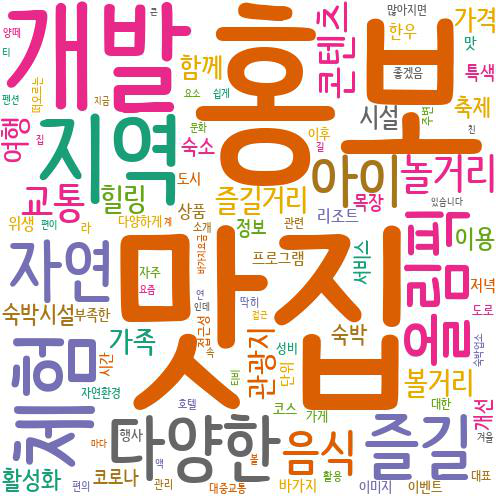

In [284]:
clean1['Tokenized_wo_stopwords'] = clean1['Tokenized'].apply(
    lambda x: [item for item in x if item not in stopwords_list])

clean2['Tokenized_wo_stopwords'] = clean2['Tokenized'].apply(
    lambda x: [item for item in x if item not in stopwords_list])
# 불용어를 제거합니다.
clean1,clean2

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


(                                              Question  ...                             Tokenized_wo_stopwords
 번호                                                      ...                                                   
 1                                   먹거리가 딱히 가격도 좀 비싸고요  ...                                [먹거리, 딱히, 가격, 비싸고요]
 3                  스키장 외엔 별로입니다 블로그 등 광고를 통해 많이 홍보해주세요  ...                             [스키장, 블로그, 광고, 통해, 홍보]
 4    관광 콘텐츠 평칭만의 특별한 관광 콘텐츠 개발이 필요함 모든 연령층의 이목을 주목시...  ...  [콘텐츠, 평칭, 특별한, 콘텐츠, 개발, 필요함, 모든, 연령, 층, 이목, 주목...
 5           그 지역에서만 비교적 저렴한 가격으로 맛볼 수 있는 먹거리가 있었으면 합니다  ...                    [지역, 에서만, 비교, 저렴한, 가격, 맛볼, 먹거리]
 6    평창 하면 올림픽인데 딱히 이것밖에 없다는 이미지가 강한 거 같아 요 코로나로 제약...  ...  [올림픽, 딱히, 밖에, 없다는, 이미지, 강한, 코로나, 제약, 많지만, 상황, ...
 ..                                                 ...  ...                                                ...
 689                            핫스폿 개발로 젊은 층 유입이 필요해 보임  ...                      [핫스폿, 개발, 젊은, 층, 유입, 필

In [285]:
vocab = {}
vocab2={}
 # 파이썬의 dictionary 자료형

for i in clean1.index:
    for word in clean1['Tokenized_wo_stopwords'][i]: 
        if word not in vocab:
            vocab[word] = 1 # 새로운 단어는 index가 되어 value인 숫자 0과 함께 추가 됨 
        else : vocab[word] += 1   #현재 vocab에는 중복을 제거한 단어와 각 단어에 대한 빈도수가 기록되어져 있습니다

for i in clean2.index:
    for word in clean2['Tokenized_wo_stopwords'][i]: 
        if word not in vocab2:
            vocab2[word] = 1 # 새로운 단어는 index가 되어 value인 숫자 0과 함께 추가 됨 
        else : vocab2[word] += 1   #현재 vocab에는 중복을 제거한 단어와 각 단어에 대한 빈도수가 기록되어져 있습니다

vocab = sorted(vocab.items(), key=lambda x: (x[1]), reverse=True)
vocab2= sorted(vocab2.items(),key=lambda x: (x[1]), reverse=True)

print(type(vocab))
print(vocab)
print(vocab2)

<class 'list'>
[('홍보', 83), ('먹거리', 63), ('개발', 57), ('지역', 57), ('체험', 47), ('다양한', 45), ('즐길', 44), ('올림픽', 43), ('자연', 41), ('아이', 41), ('음식', 41), ('놀거리', 40), ('콘텐츠', 39), ('교통', 39), ('즐길거리', 38), ('여행', 38), ('볼거리', 37), ('관광지', 37), ('힐링', 36), ('가족', 34), ('맛집', 31), ('가격', 29), ('함께', 27), ('시설', 27), ('이용', 26), ('활성화', 24), ('축제', 23), ('숙박시설', 23), ('숙박', 22), ('숙소', 20), ('개선', 19), ('코로나', 17), ('서비스', 17), ('정보', 17), ('목장', 17), ('특색', 16), ('상품', 15), ('한우', 15), ('리조트', 15), ('프로그램', 14), ('위생', 14), ('저녁', 14), ('도시', 13), ('코스', 13), ('맛', 13), ('시간', 13), ('바가지', 13), ('부족한', 13), ('단위', 13), ('이미지', 12), ('이벤트', 12), ('행사', 12), ('성비', 11), ('가게', 11), ('도로', 11), ('다양하게', 11), ('접근성', 11), ('대표', 10), ('대한', 10), ('자연환경', 10), ('주변', 10), ('딱히', 9), ('편의', 9), ('소개', 9), ('호텔', 9), ('활용', 9), ('대중교통', 9), ('관리', 9), ('집', 8), ('요소', 8), ('쉽게', 8), ('편이', 8), ('티비', 8), ('숙박업소', 8), ('문화', 8), ('속', 8), ('겨울', 8), ('펜션', 8), ('길', 8), ('양떼', 8), ('바가지요금', 7), ('접

In [ ]:
len(vocab)

1986

#  단어 카운트 횟수 생성

In [ ]:
dict_vocab=dict(vocab)
vocab_list=list(dict_vocab.values())
print(sp.stats.describe(vocab_list))
print('median=',np.median(vocab_list))
print('90% = ',np.percentile(vocab_list,90))
print('95% = ',np.percentile(vocab_list,95))

DescribeResult(nobs=1986, minmax=(1, 93), mean=2.5327291037260826, variance=28.47776957594852, skewness=8.607260408262583, kurtosis=98.00741280008269)
median= 1.0
90% =  4.0
95% =  6.0


#### (word, count) csv저장

In [286]:
vocab_data=pd.DataFrame(vocab)
vocab_data.columns=['word','count']
vocab_data.to_csv('/gdrive/My Drive/Colab Notebooks/Pyeong Chang/vocab_list_encoding.csv',encoding='euc-kr')

vocab_data2=pd.DataFrame(vocab2)
vocab_data2.columns=['word','count']
vocab_data2.to_csv('/gdrive/My Drive/Colab Notebooks/Pyeong Chang/vocab2_list_encoding.csv',encoding='euc-kr')

# Wordcloud 생성

In [ ]:
from wordcloud import WordCloud

wc=WordCloud(font_path='/gdrive/My Drive/Colab Notebooks/KU-BIG/NLP Study/NanumBarunpenB.ttf',
             width=500,height=500,margin=3,max_words=100,max_font_size=200,font_step=5,colormap='PuBuGn')
wc.generate_from_frequencies(dict(vocab))
wc.to_file('/gdrive/My Drive/Colab Notebooks/Pyeong Chang/Pyeong ChangPyeongChang_2.jpeg')

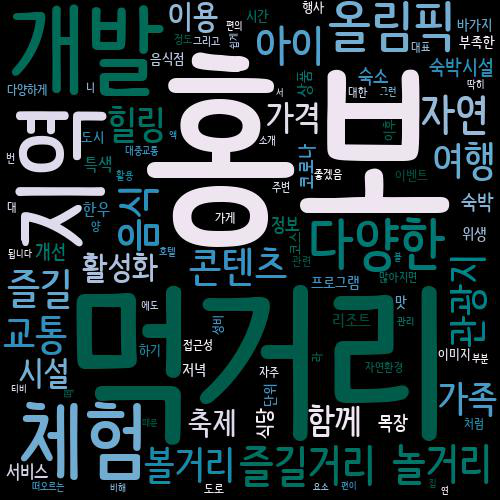

In [ ]:
import PIL.Image as pilimg

a = pilimg.open('/gdrive/My Drive/Colab Notebooks/Pyeong ChangPyeongChang_1.jpeg')
a

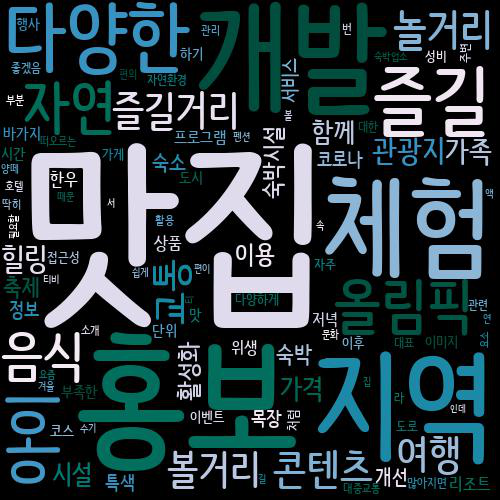

In [ ]:
a = pilimg.open('/gdrive/My Drive/Colab Notebooks/Pyeong Chang/Pyeong ChangPyeongChang_2.jpeg')
a

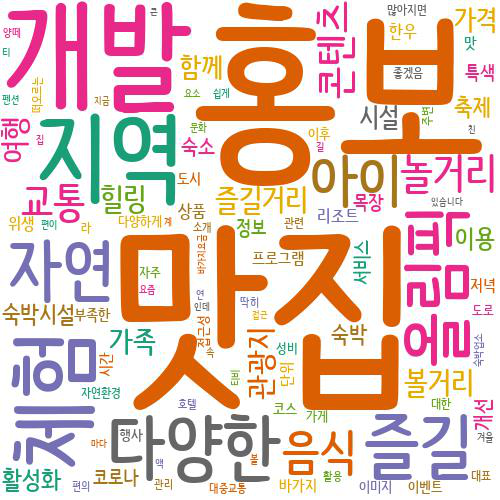

In [ ]:
wc=WordCloud(font_path='/gdrive/My Drive/Colab Notebooks/KU-BIG/NLP Study/NanumBarunpenB.ttf',
             width=500,height=500,margin=3,max_words=100,max_font_size=200,font_step=5,background_color='white',colormap='Dark2')
wc.generate_from_frequencies(dict(vocab))
wc.to_file('/gdrive/My Drive/Colab Notebooks/Pyeong Chang/Pyeong ChangPyeongChang_3.jpeg')
a = pilimg.open('/gdrive/My Drive/Colab Notebooks/Pyeong Chang/Pyeong ChangPyeongChang_3.jpeg')
a

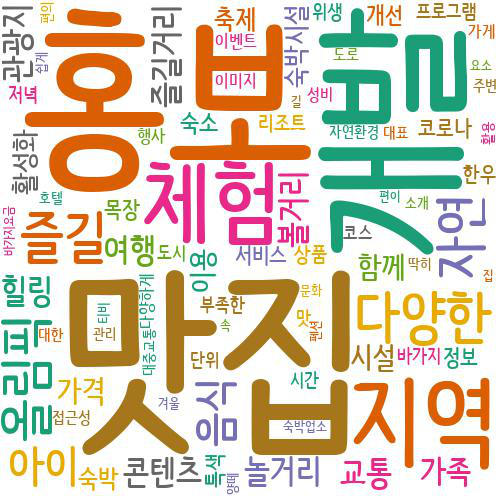

In [ ]:
wc=WordCloud(font_path='/gdrive/My Drive/Colab Notebooks/KU-BIG/NLP Study/NanumBarunpenB.ttf',
             width=500,height=500,margin=3,max_words=80,max_font_size=200,font_step=5,background_color='white'
             ,colormap='Dark2')
wc.generate_from_frequencies(dict(vocab))
wc.to_file('/gdrive/My Drive/Colab Notebooks/Pyeong Chang/Pyeong ChangPyeongChang_4.jpeg')
a = pilimg.open('/gdrive/My Drive/Colab Notebooks/Pyeong Chang/Pyeong ChangPyeongChang_4.jpeg')
a

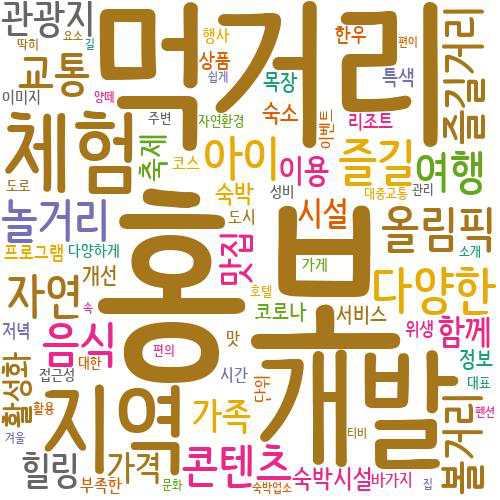

In [287]:
wc=WordCloud(font_path='/gdrive/My Drive/Colab Notebooks/KU-BIG/NLP Study/NanumBarunpenB.ttf',
             width=500,height=500,margin=3,max_words=80,max_font_size=200,font_step=5,background_color='white'
             ,colormap='Dark2')
wc.generate_from_frequencies(dict(vocab))
wc.to_file('/gdrive/My Drive/Colab Notebooks/Pyeong Chang/Pyeong ChangPyeongChang_5.jpeg')
a = pilimg.open('/gdrive/My Drive/Colab Notebooks/Pyeong Chang/Pyeong ChangPyeongChang_5.jpeg')
a

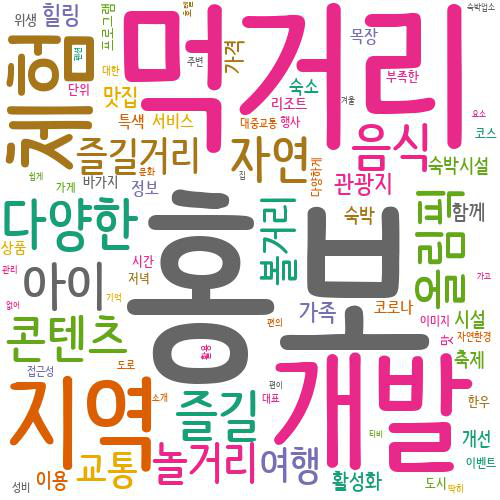

In [289]:
wc=WordCloud(font_path='/gdrive/My Drive/Colab Notebooks/KU-BIG/NLP Study/NanumBarunpenB.ttf',
             width=500,height=500,margin=3,max_words=80,max_font_size=200,font_step=5,background_color='white'
             ,colormap='Dark2')
wc.generate_from_frequencies(dict(vocab2))
wc.to_file('/gdrive/My Drive/Colab Notebooks/Pyeong Chang/Pyeong ChangPyeongChang_5_2.jpeg')
a = pilimg.open('/gdrive/My Drive/Colab Notebooks/Pyeong Chang/Pyeong ChangPyeongChang_5_2.jpeg')
a